<img src="./img/HWNI_logo.svg"/>

# Plotting Cookbook

Visualizing data is just as important as analyzing it statistically. In addition to helping you communicate your findings to others, it also helps you interpret your own data before and during rigorous statistics.

As such, a major goal of this course is for you to learn to create many different kinds of high-quality data visualizations.

This JuPyter notebook serves as a "cookbook" to help get you started on whipping up tasty visualizations of your data. Like any cookbook, the recipes are only guidelines, and they reflect the taste of the chef who wrote them. You should build off this cookbook, making your own notes in the margins and adding in new pages as you go.

Let's get started by importing everything we need.

In [1]:
# makes our plots show up inside JuPyter
%matplotlib inline

# numpy - linear algebra and matrices for python
import numpy as np

# pandas - "DataFrames" to organize our data
import pandas as pd

# scipy - data science toolkit for python
from scipy import stats, integrate

# matplotlib - workhorse plotting library
import matplotlib.pyplot as plt

# seaborn - easy plotting for statistical visualizations
#   based off of matplotlib
import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")

import util.plots as plot 

# this makes our tables easier to read
from IPython.core.display import HTML
css = open('./css/style-table.css').read()
#this line has to be the last in its cell
HTML('<style>{}</style>'.format(css)) 

Now, let's pull in some data. We'll be using the [`iris` dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), a classic "demonstration" data set that goes back to a 1936 paper by Ronald Fisher, one of the founders of modern statistics.

Each row represents the observations associated to a single flower of the genus _Iris_. Four of the columns contain anatomical measurements -- the length and width of the flower's petal and sepal (see diagram below). The last column tells us what species the flower is.

In [2]:
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<img src="./img/flowanatomy.png" width=33%/>

Image credit: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Sepal2_%28PSF%29.png).

## Visualizing Distributions

### Histograms + Density Estimates

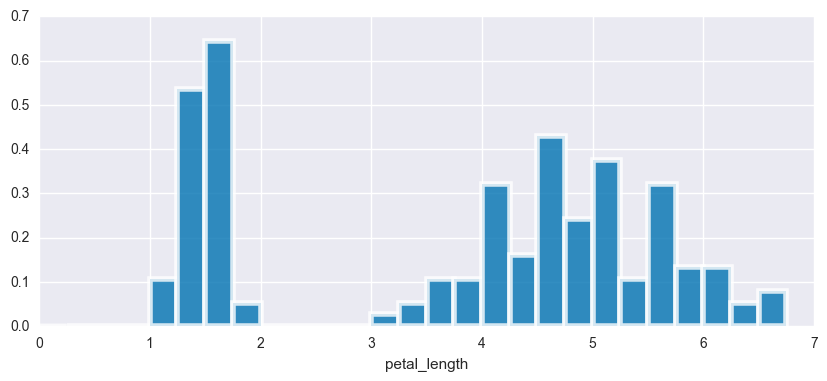

In [3]:
# histogram

# one way to set figure size: make the figure ahead of time,
#  and specify the size with figsize

figure = plt.figure(
                    figsize=(10,4)
                    )

# styling for the histogram
#  to see all possible options, check out
#  the documentation for matplotlib's hist function

# this is a "dictionary" -- like an array or list,
#  but you use strings instead of numbers

histogram_parameters = {# "keyword":value
    
                        # how thick should the outlines be?
                        "linewidth":4,
    
                        # what color should the outlines be?
                        "edgecolor":"white",
    
                        # how opaque are the bars? 
                        # 1 - totally opaque, 0 - invisible
                        "alpha":0.8,
    
                        # normalize to 1
                        "normed":True,
                        }

# the seaborn function distplot can plot histograms and density estimates
#  on top of each other

plot = sns.distplot(
                    # use the petal lengths data
                    iris.petal_length,
    
                    # plot histogram, don't plot density estimate
                    hist=True, kde=False, 
    
                    # evenly spaced bins from 0 to 7 with width 0.25
                    bins = np.arange(0,7,0.25),
    
                    # use the style we described above
                    hist_kws=histogram_parameters
                   )

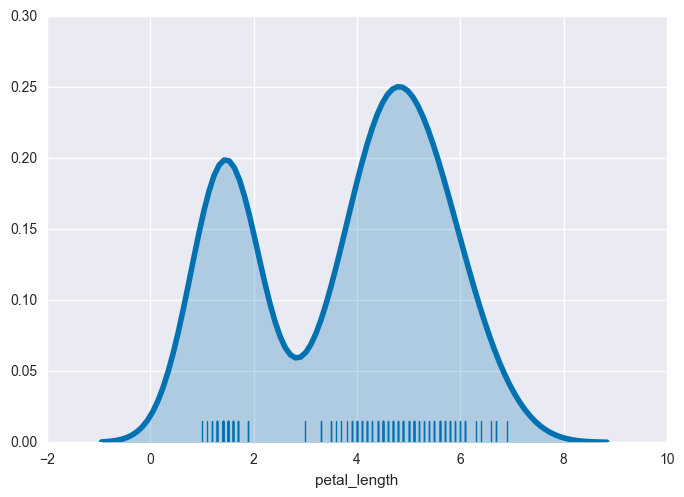

In [4]:
# density

# styling for the density plot
#  to see all options, check out the plt.plot documentation

# this is a "dictionary" -- like an array or list,
#  but you use strings instead of numbers

kde_parameters = {# "keyword":value
    
                    # how thick should the line be?
                    "linewidth":4,
    
                    # shade underneath the curve
                    "shade":True
                    }

# the same searborn function can do density estimates

plot = sns.distplot(
                    # use the petal lengths data
                    iris.petal_length,
    
                    # don't plot histogram, do plot density estimate
                    hist=False, kde=True,
    
                    # add tick marks for data
                    rug=True,

                    # use the style we described above
                    kde_kws=kde_parameters,
                   )

#### By Category

When we want to split our data set up into subsets and plot each subset, we use seaborn's `FacetGrids`. Most commonly, this is because we want to make the same plot for multiple conditions (e.g. treatment and control).

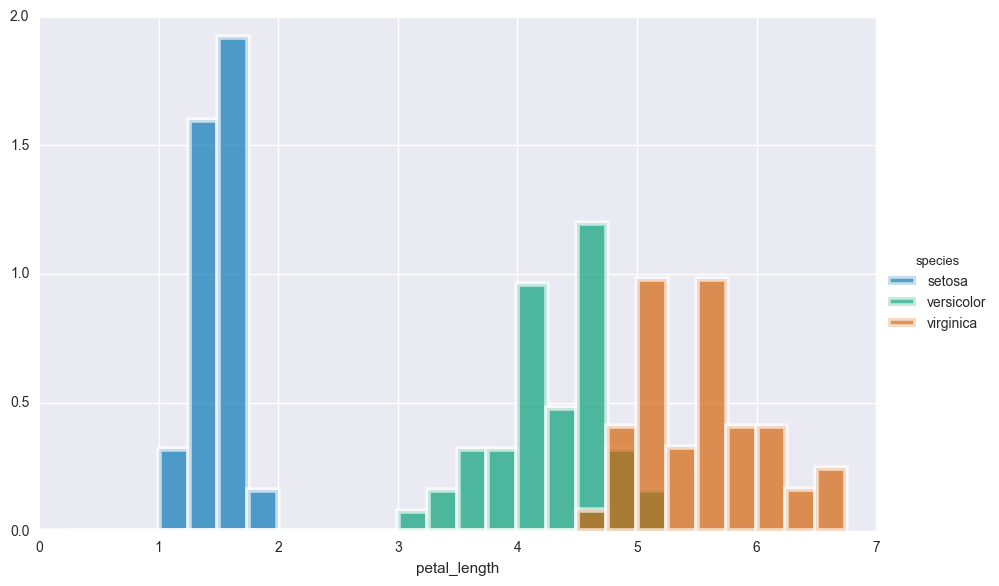

In [6]:
# histogram

# styling for the histogram
#  to see all possible options, check out
#  the documentation for matplotlib's hist function

# this is a "dictionary" -- like an array or list,
#  but you use strings instead of numbers

histogram_parameters = {# "keyword":value
    
                        # how thick should the outlines be?
                        "linewidth":4,
    
                        # what color should the outlines be?
                        "edgecolor":"white",
    
                        # how opaque are the bars? 
                        # 1 - totally opaque, 0 - invisible
                        "alpha":0.67,
    
                        # normalize to 1
                        "normed":True,
                        }


# FacetGrid splits our data into "facets",
#  where each facet is a subset of our data
#  here, we subset using the "species" column

facets = sns.FacetGrid(
                     iris, #use the iris data
                     hue = "species", #split up by species
                     size = 6, # make the figure bigger
                     aspect = 1.5, # and make it wider than it is tall
                     )

# the "map" method applies the plotting function to each facet.
#  here, that means it makes a histogram for each facet.

plot = facets.map(
    # apply the histogram plotting function
    sns.distplot,
    
    # only apply to the petal length data
    "petal_length",
    
    # evenly spaced bins from 0 to 7 with width 0.25
    bins = np.arange(0,7,0.25),
    
    # plot histogram, don't plot density estimate
    hist=True, kde=False, 
    
    # use the style we described above
    hist_kws = histogram_parameters
            )

plot.add_legend(); #facet plots have an easy way to set legends

#### Joint Histograms and Densities

The best way to generalize a histogram to two dimensions is something called a "hexplot" -- instead of counting the number of observations in a box, you count the number of observations inside a hexagon.

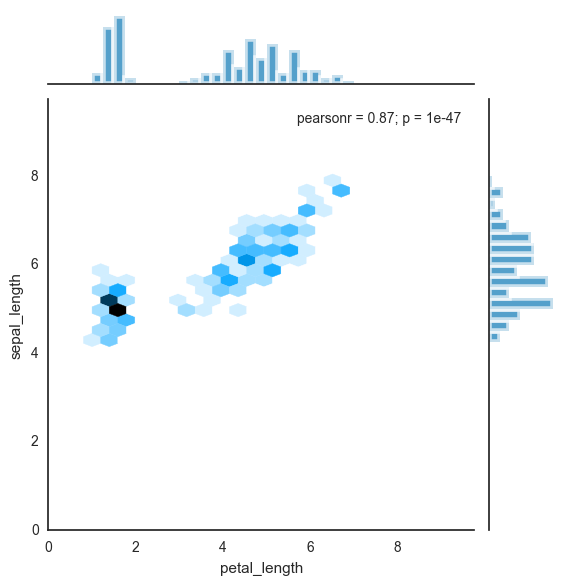

In [7]:
distplot_parameters = {
                        # our histogram parameters are an argument to distplot
                        "hist_kws":histogram_parameters,
                        
                        # and so is bins
                       "bins":np.arange(0,10,0.25)
                      }

histogram_parameters = {
                        # how thick should the outlines be?
                        "linewidth":4,
    
                        # what color should the outlines be?
                        "edgecolor":"white",
    
                        # how opaque are the bars? 
                        # 1 - totally opaque, 0 - invisible
                        "alpha":0.67,
    
                        # normalize to 1
                        "normed":True,
                        }


# use with blocks to change plot style briefly -- here, we're making the background white
with sns.axes_style("white"):
    plot = sns.jointplot(
                x=iris.petal_length, 
                y=iris.sepal_length, 
                kind="hex",
                marginal_kws = distplot_parameters,
                gridsize=15
    );

We can make joint densities as well.

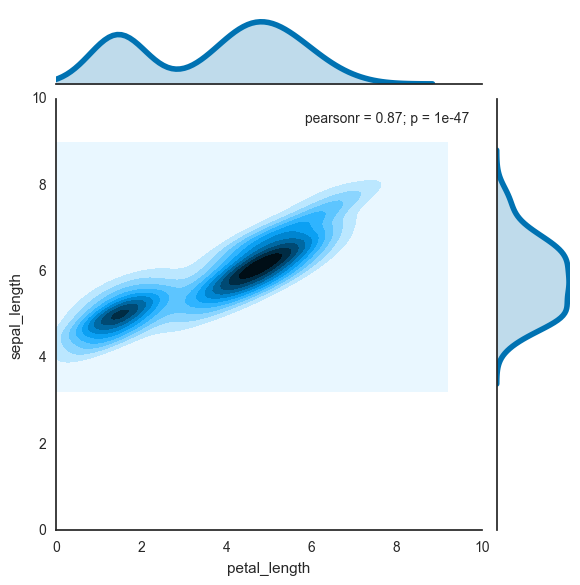

In [8]:
# density

distplot_parameters = {"kde_kws":kde_parameters}

kde_parameters = {
                  # how thick should the curve be?
                    "linewidth":4,
                        }


with sns.axes_style("white"):
    plot = sns.jointplot(
                x=iris.petal_length, 
                y=iris.sepal_length, 
                kind="kde",
                marginal_kws = kde_parameters,
    );

# control the axes with plot.ax_joint, plot.ax_marg_x, and plot.ax_marg_y
plot.ax_joint.set_xlim(0,10)
plot.ax_joint.set_ylim(0,10);

#### Advanced: Faceted Joint Densities

You might want to put the above ideas together and build a plot for a faceted joint distribution. Unfortunately, that's not currently directly supported by seaborn. Seaborn does give you the tools to build all kinds of plots, but the degree of difficulty is a bit higher for anything that goes off the beaten path.

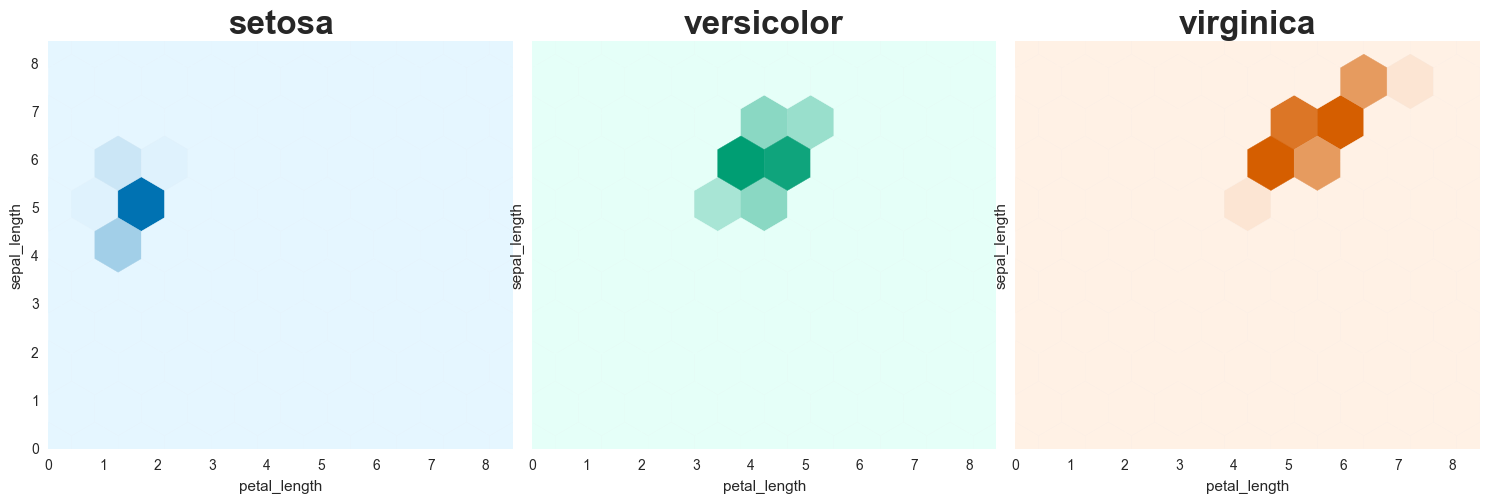

In [183]:
# we have to define our own version of the hexbin function

def jointHex(x,y, # x and y are given by us, below
             color, # color will be provided by FacetGrid
             **kwargs): #**kwargs lets us add any other keyword arguments from plt.hexbin
    
    # define colormap here
    cmap = sns.light_palette(color, as_cmap=True) 
    
    # and then use matplotlib to make the chart
    plt.hexbin(x, y, cmap=cmap, **kwargs)

facets = sns.FacetGrid(
                     iris, #use the iris data
                     hue = "species", # color by species
                     col = "species", # and plot them in separate plots
                     size = 5, # make the figure bigger
                     )

xColumn = "petal_length"
yColumn = "sepal_length"

with sns.axes_style("white"):
    plots = facets.map(
                # apply our jointHex plotting function to each facet
                jointHex,
        
                # we provide x and y here, in order:
                xColumn,
                yColumn,
        
                # **kwargs go here, as many or as few as we want
                extent = [0,8.5,0,8.5],
                gridsize=10,
    );
    
# if we want to adjust the plots directly, e.g. to change axis limits,
#  we need to interact with the plots variable

# plots.axes is an array of axes. it's designed to hold a two-d grid of plots
#  plots[0] gives us the first row of plots -- for us, that's all of them.
#  plot[0,0] would give us the plot from the first column of the first row.

# here's an example of how to make axis-by-axis adjustments

for plot,species in zip(plots.axes[0],iris.species.unique()):
    
    plot.set_title(species,
                   fontweight="bold",
                   fontsize=24)
    
    plot.set_xlabel(xColumn); 
    plot.set_ylabel(yColumn)

### Scatter Plots

The one-dimensional version of a scatter plot is a rug plot, as covered above in the section on plotting densities.

#### By Category

#### Joint Scattering

## Visualizing Summary Statistics

pandas.core.frame.DataFrame

## Visualizing Models